## Style Transfer with Deep Neural Networks

### source : [Image Style Transfer by gatys](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)

- Style transfer uses the features found in the **19-layer VGG Network**, which is comprised of a series of convolutional and pooling layers, and a few fully-connected layers
- The convolutional layers are named by stack and their order in the stack. Conv_1_1 is the first convolutional layer that an image is passed through, in the first stack. Conv_2_1 is the first convolutional layer in the second stack. The deepest convolutional layer in the network is conv_5_4.

## Separating Style and Content

Style transfer relies on separating the content and style of an image. Given one content image and one style image, we aim to create a new, target image which should contain our desired content and style components:

- objects and their arrangement are similar to that of the **content image**
- style, colors, and textures are similar to that of the **style image**
- **Use  pre-trained VGG19 Net to extract content or style features from a passed in image**





## COLLECTING IMAGES - CONTENT AND STYLE

In [86]:
# COLLECTING CONTENT IMAGE

!wget https://user-images.githubusercontent.com/24764528/51069162-cbdd0d80-164f-11e9-9e48-f0c25aea6dcf.jpg
# !wget https://images-na.ssl-images-amazon.com/images/I/A1RJ32TMH1L._SX425_.jpg

!ls

--2019-01-12 04:23:19--  https://user-images.githubusercontent.com/24764528/51069162-cbdd0d80-164f-11e9-9e48-f0c25aea6dcf.jpg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76225 (74K) [image/jpeg]
Saving to: ‘51069162-cbdd0d80-164f-11e9-9e48-f0c25aea6dcf.jpg’

51069162-cbdd0d80-1 100%[===================>]  74.44K  --.-KB/s    in 0.02s   

2019-01-12 04:23:19 (3.67 MB/s) - ‘51069162-cbdd0d80-164f-11e9-9e48-f0c25aea6dcf.jpg’ saved [76225/76225]

'1*4mU2oi783iXxkE_V1-88ow.jpeg'			       hockney.jpg.1
 51068341-abf31d00-1642-11e9-951d-7ae7c78fde9b.jpg     images
 51068341-abf31d00-1642-11e9-951d-7ae7c78fde9b.jpg.1   octopus.jpg
 51069132-23c74480-164f-11e9-8c3e-f9124db7b483.jpg     octopus.jpg.1
 51069162-cbdd0d80-164f-11e9-9e48-f0c

In [99]:
# COLLECTING STYLE IMAGE
!wget https://user-images.githubusercontent.com/24764528/51069243-232fad80-1651-11e9-9a77-e0d83a765134.jpg
!ls

--2019-01-12 04:32:59--  https://user-images.githubusercontent.com/24764528/51069243-232fad80-1651-11e9-9a77-e0d83a765134.jpg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45473 (44K) [image/jpeg]
Saving to: ‘51069243-232fad80-1651-11e9-9a77-e0d83a765134.jpg.1’

51069243-232fad80-1 100%[===================>]  44.41K  --.-KB/s    in 0.02s   

2019-01-12 04:32:59 (2.17 MB/s) - ‘51069243-232fad80-1651-11e9-9a77-e0d83a765134.jpg.1’ saved [45473/45473]

'1*4mU2oi783iXxkE_V1-88ow.jpeg'			       hockney.jpg
 51068341-abf31d00-1642-11e9-951d-7ae7c78fde9b.jpg     hockney.jpg.1
 51068341-abf31d00-1642-11e9-951d-7ae7c78fde9b.jpg.1   images
 51069132-23c74480-164f-11e9-8c3e-f9124db7b483.jpg     octopus.jpg
 51069162-cbdd0d80-164f-11e9-9e48-f

## INSTALLING DEPENDENCIES

In [69]:
# Installing pytorch and torchvision
!pip3 install torch torchvision


!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 2.0MB 13.2MB/s 


## IMPORTING RESOURCES

In [0]:

# import resources
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
from torchvision import transforms, models

## Load in VGG19 (features)
VGG19 is split into two portions:

- **vgg19.features**, which are all the convolutional and pooling layers
- **vgg19.classifier**, which are the three linear, classifier layers at the end

**We only need the features portion, which we're going to load in and "freeze" the weights of, below.**

In [0]:

# get the "features" portion of VGG19 (we will not need the "classifier" portion)
vgg = models.vgg19(pretrained=True).features

# freeze all VGG parameters since we're only optimizing the target image
for param in vgg.parameters():
    param.requires_grad_(False)

In [73]:
# move the model to GPU, if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

## Load in Content and Style Images
You can load in any images you want! Below, we've provided a helper function for loading in any type and size of image. The load_image function also converts images to normalized Tensors.

Additionally, it will be easier to have smaller images and to squish the content and style images so that they are of the same size.

In [0]:

def  load_image(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    
    image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

Next, I'm loading in images by file name and forcing the style image to be the same size as the content image.

In [0]:

# load in content and style image
content = load_image('51069162-cbdd0d80-164f-11e9-9e48-f0c25aea6dcf.jpg').to(device)
# Resize style to match content, makes code easier
style = load_image('51069243-232fad80-1651-11e9-9a77-e0d83a765134.jpg', shape=content.shape[-2:]).to(device)

In [0]:
# helper function for un-normalizing an image 
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

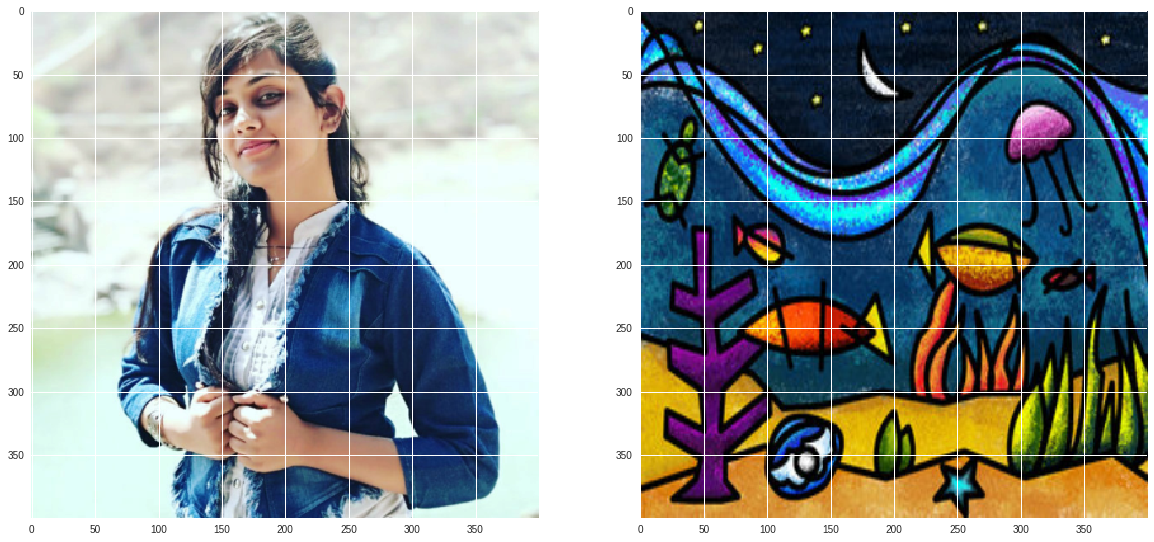

In [103]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

## VGG19 Layers

In [104]:
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

## Content and Style Features
 Mapping of layer names to the names found in the paper for the content representation and the style representation.
The first layer (0) to conv1_1 has been done for you, below.

In [0]:
def get_features(image, model, layers=None):
    """ Run an image forward through a model and get the features for 
        a set of layers. Default layers are for VGGNet matching Gatys et al (2016)
    """
    
    ##  mapping layer names of PyTorch's VGGNet to names from the paper
    ## Need the layers for the content and style representations of an image
    if layers is None:
        layers = {'0': 'conv1_1',
                 '5': 'conv2_1',
                 '10': 'conv3_1',
                 '19': 'conv4_1',
                 '21': 'conv4_2',
                 '28': 'conv5_1'}
        
    ## -- do not need to change the code below this line -- ##
    features = {}
    x = image
    # model._modules is a dictionary holding each module in the model
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
            
    return features


## Gram Matrix
The output of every convolutional layer is a Tensor with dimensions associated with the batch_size, a depth, d and some height and width (h, w). The Gram matrix of a convolutional layer can be calculated as follows:

- Get the depth, height, and width of a tensor using batch_size, d, h, w = tensor.size
- Reshape that tensor so that the spatial dimensions are flattened
- Calculate the gram matrix by multiplying the reshaped tensor by it's transpose

Note: You can multiply two matrices using torch.mm(matrix1, matrix2).

In [0]:
def gram_matrix(tensor):
    """ Calculate the Gram Matrix of a given tensor 
        Gram Matrix: https://en.wikipedia.org/wiki/Gramian_matrix
    """
    
    ## get the batch_size, depth, height, and width of the Tensor
    ## reshape it, so we're multiplying the features for each channel
    ## calculate the gram matrix
    tensor = tensor.view(tensor.shape[1], tensor.shape[2]*tensor.shape[3])
    gram = torch.mm(tensor, tensor.t())
    
    return gram 

## Putting it all Together
We'll extract our features from our images and calculate the gram matrices for each layer in our style representation.

In [0]:
# get content and style features only once before forming the target image
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

# calculate the gram matrices for each layer of our style representation
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# create a third "target" image and prep it for change
# it is a good idea to start of with the target as a copy of our *content* image
# then iteratively change its style
target = content.clone().requires_grad_(True).to(device)

## Loss and Weights
### Individual Layer Style Weights
Below, you are given the option to weight the style representation at each relevant layer. It's suggested that you use a range between 0-1 to weight these layers. By weighting earlier layers (conv1_1 and conv2_1) more, you can expect to get larger style artifacts in your resulting, target image. Should you choose to weight later layers, you'll get more emphasis on smaller features. This is because each layer is a different size and together they create a multi-scale style representation!

### Content and Style Weight
**Just like in the paper, we define an alpha (content_weight) and a beta (style_weight). This ratio will affect how stylized your final image is. It's recommended that you leave the content_weight = 1 and set the style_weight to achieve the ratio you want.**

In [0]:
# weights for each style layer 
# weighting earlier layers more will result in *larger* style artifacts
# notice we are excluding `conv4_2` our content representation
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.8,
                 'conv3_1': 0.5,
                 'conv4_1': 0.3,
                 'conv5_1': 0.1}

# you may choose to leave these as is
content_weight = 1  # alpha
style_weight = 1e6  # beta


## Updating the Target & Calculating Losses

- decide on a number of steps for which to update your image, 
- only changing our target image and nothing else about VGG19 or any other image. 

Inside the iteration loop, you'll calculate the content and style losses and update your target image, accordingly.

### Content Loss
The content loss will be the mean squared difference between the target and content features at layer conv4_2. This can be calculated as follows:

content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)

### Style Loss
- The style loss is calculated in a similar way, only you have to iterate through a number of layers, specified by name in our dictionary  style_weights.

- calculate the gram matrix for the target image, target_gram and style image style_gram at each of these layers and compare those gram matrices, calculating the layer_style_loss. Later, you'll see that this value is normalized by the size of the layer.

-Total Loss
Finally, you'll create the total loss by adding up the style and content losses and weighting them with your specified alpha and beta!


Total loss:  11045574.0


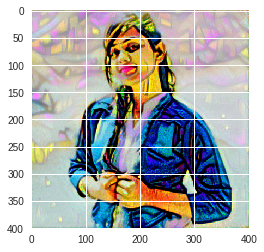

Total loss:  5780395.5


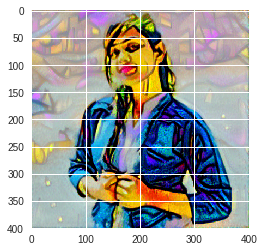

Total loss:  4157687.75


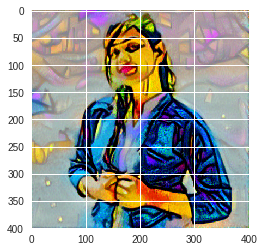

Total loss:  3244494.0


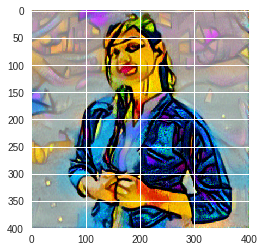

Total loss:  2621053.0


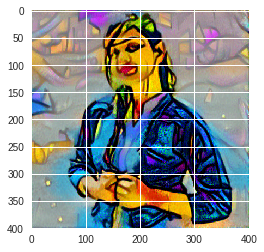

Total loss:  2168279.0


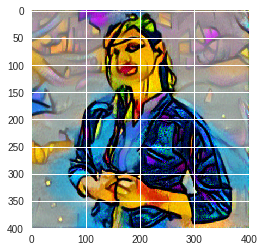

In [111]:
# for displaying the target image, intermittently
show_every = 400

# iteration hyperparameters
optimizer = optim.Adam([target], lr=0.003)
steps = 2400  # decide how many iterations to update your image (5000)

for ii in range(1, steps+1):
    
    ## TODO: get the features from your target image    
    ## Then calculate the content loss
    target_features = get_features(target, vgg)
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    # the style loss
    # initialize the style loss to 0
    style_loss = 0
  # iterate through each style layer and add to the style loss
    for layer in style_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        _, d, h, w = target_feature.shape
        
        ## TODO: Calculate the target gram matrix
        target_gram = gram_matrix(target_feature)
        
        ## TODO:  get the "style" style representation
        style_gram = style_grams[layer]
        
        ## TODO: Calculate the style loss for one layer, weighted appropriately
        layer_style_loss = style_weights[layer] * torch.mean((style_gram - target_gram)**2)
        
        # add to the style loss
        style_loss += layer_style_loss / (d * h * w)
        
        
    ## TODO:  calculate the *total* loss
    total_loss = content_weight * content_loss + style_weight * style_loss
    
    ## -- do not need to change code, below -- ##
    # update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  ii % show_every == 0:
        print('Total loss: ', total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()

## Display the Target Image

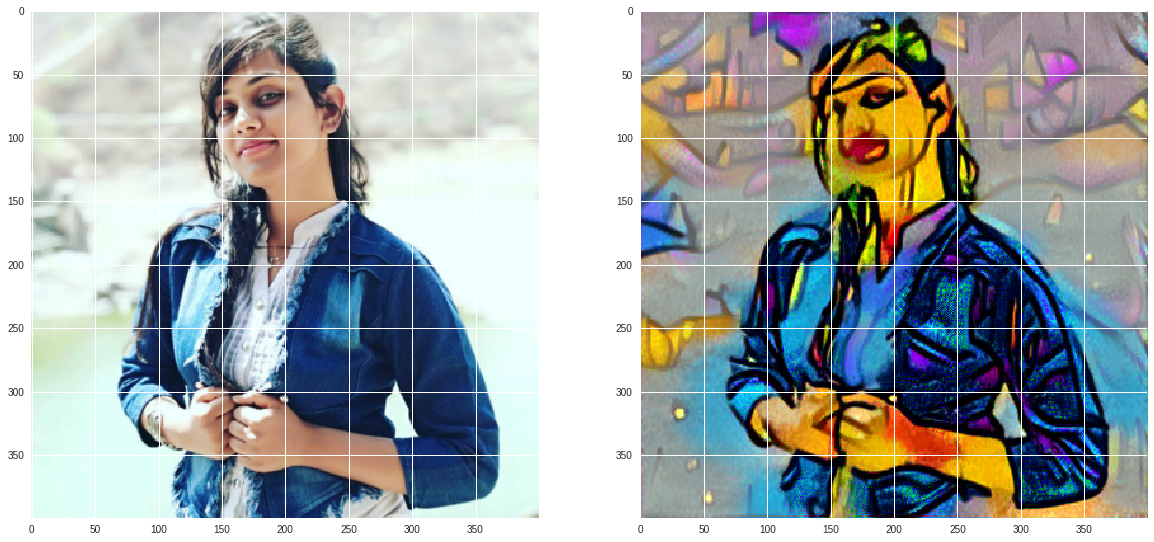

In [114]:
# display content and final, target image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(target))